In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

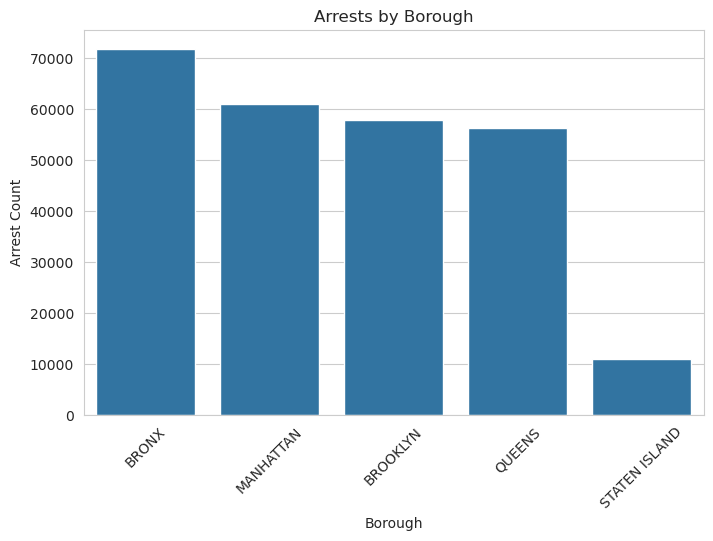

In [96]:
df = pd.read_csv("dataset/NYPD_Arrest_Data__Year_to_Date_cleaned.csv")

sns.set_style("whitegrid")

df.describe(include="all")

# Count of arrests by borough
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Arrest_Borough", order=df["Arrest_Borough"].value_counts().index)
plt.title("Arrests by Borough")
plt.xlabel("Borough")
plt.ylabel("Arrest Count")
plt.xticks(rotation=45)
plt.show()

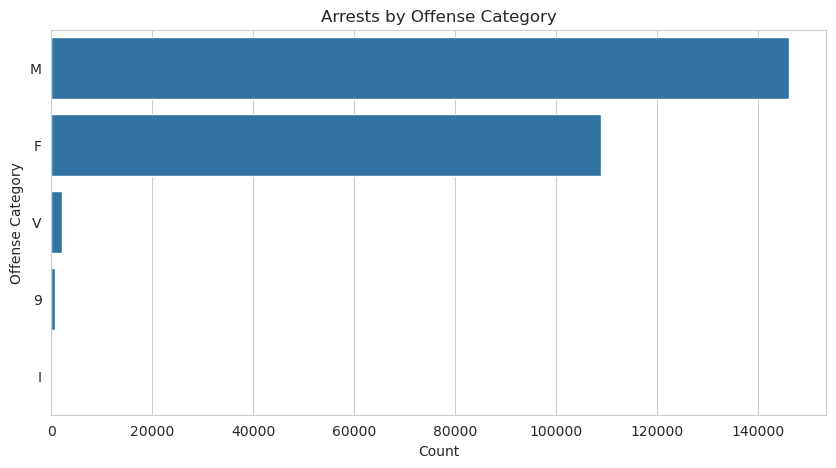

In [97]:
# Count of offenses by category
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y="Offense_Category_Code", order=df["Offense_Category_Code"].value_counts().index)
plt.title("Arrests by Offense Category")
plt.xlabel("Count")
plt.ylabel("Offense Category")
plt.show()


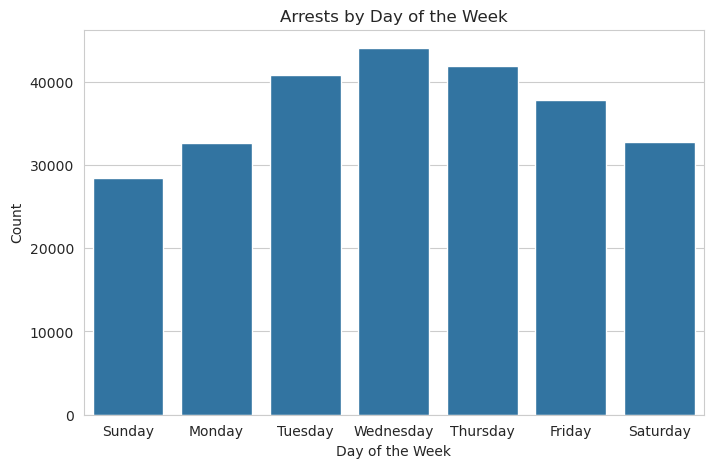

In [98]:
# Arrests by Day of the Week
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Arrest_Day_of_Week", order=["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"])
plt.title("Arrests by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Count")
plt.show()

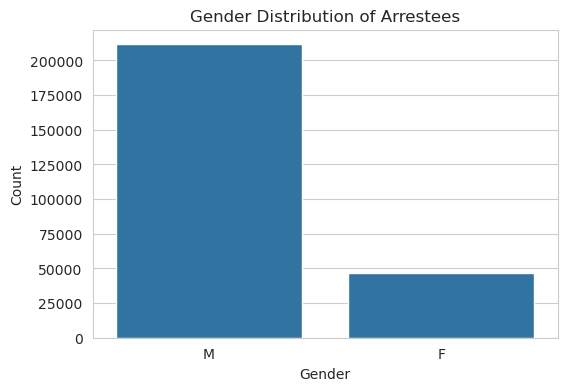

In [99]:
# Gender distribution of arrestees
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Perpetrator_Sex")
plt.title("Gender Distribution of Arrestees")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

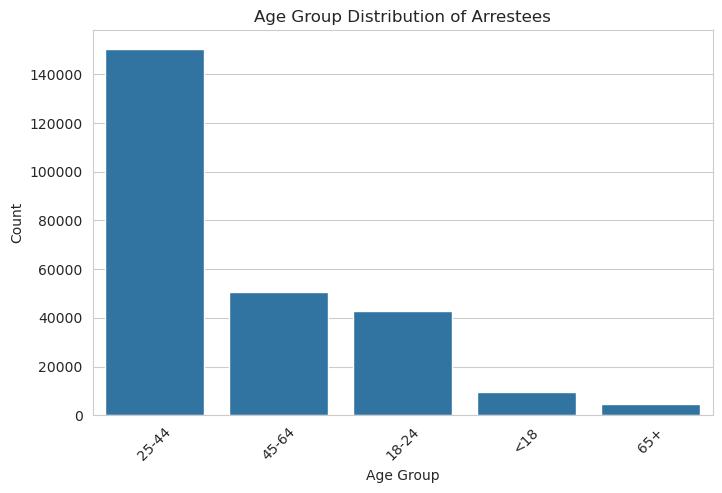

In [100]:
# Age group distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Perpetrator_Age_Group", order=df["Perpetrator_Age_Group"].value_counts().index)
plt.title("Age Group Distribution of Arrestees")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

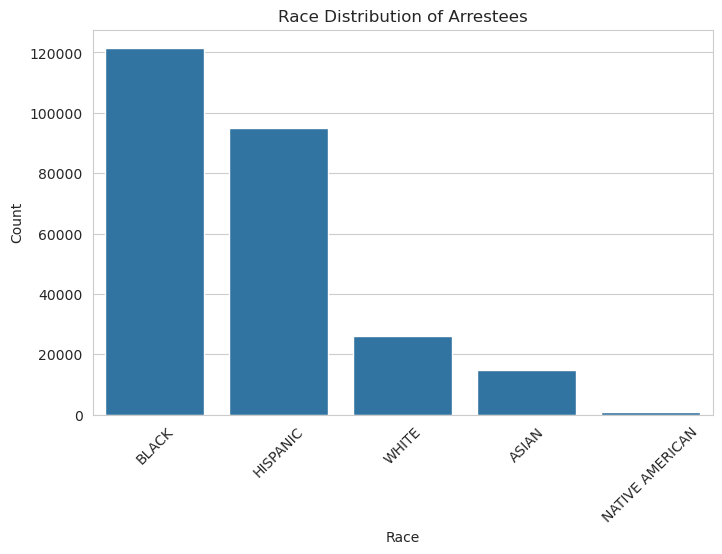

In [101]:
# Race distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Perpetrator_Race", order=df["Perpetrator_Race"].value_counts().index)
plt.title("Race Distribution of Arrestees")
plt.xlabel("Race")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

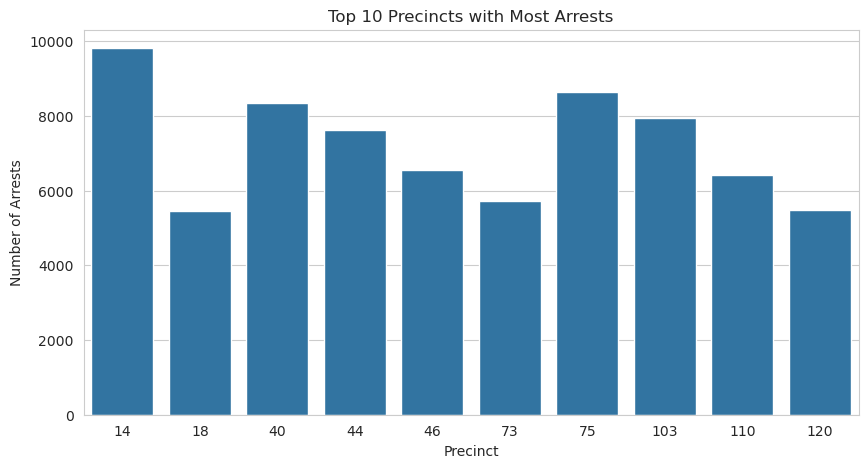

In [102]:
# Top 10 precincts with the most arrests
plt.figure(figsize=(10, 5))
top_precincts = df["Arrest_Precinct"].value_counts().nlargest(10)
sns.barplot(x=top_precincts.index, y=top_precincts.values)
plt.title("Top 10 Precincts with Most Arrests")
plt.xlabel("Precinct")
plt.ylabel("Number of Arrests")
plt.show()

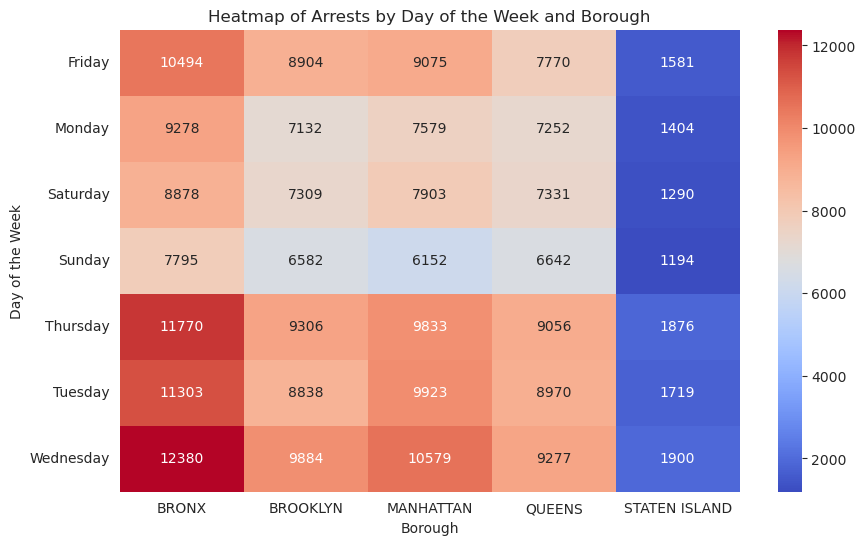

In [103]:
# Heatmap of arrests by day of the week and borough
plt.figure(figsize=(10, 6))
heatmap_data = df.pivot_table(index='Arrest_Day_of_Week', columns='Arrest_Borough', aggfunc='size', fill_value=0)
sns.heatmap(heatmap_data, cmap="coolwarm", annot=True, fmt="d")
plt.title("Heatmap of Arrests by Day of the Week and Borough")
plt.xlabel("Borough")
plt.ylabel("Day of the Week")
plt.show()

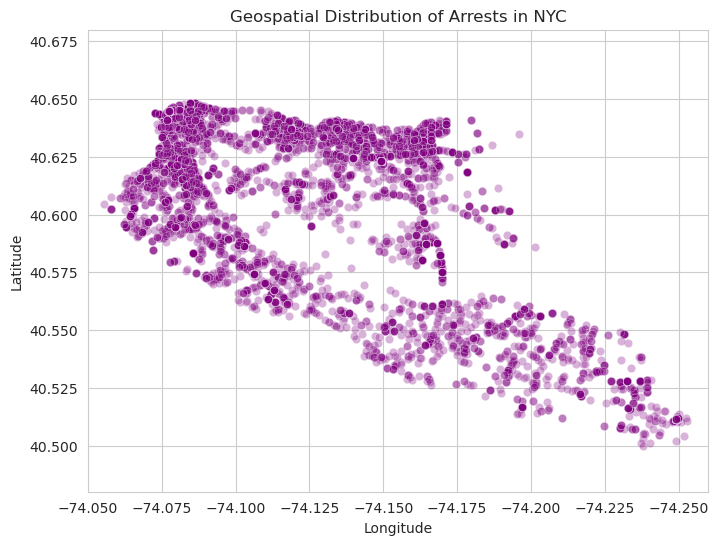

In [104]:
# Scatter plot of Latitude vs. Longitude for arrests
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Longitude", y="Latitude", alpha=0.3, color="purple")
plt.xlim([-74.05, -74.26]) 
plt.ylim([40.48, 40.68])
plt.title("Geospatial Distribution of Arrests in NYC")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [105]:
""" Convert Arrest_Date to datetime format """

df['Arrest_Date'] = pd.to_datetime(df['Arrest_Date'])

assert str(df["Arrest_Date"].dtype) == "datetime64[ns]"  # Verify converted type

In [106]:
df.dtypes

Unnamed: 0                               int64
Arrest_Date                     datetime64[ns]
Police_Department_Code                 float64
Offense_Description                     object
Offense_Key_Code                       float64
Offense_Detailed_Description            object
Law_Code                                object
Offense_Category_Code                   object
Arrest_Borough                          object
Arrest_Precinct                          int64
Jurisdiction_Code                        int64
Perpetrator_Age_Group                   object
Perpetrator_Sex                         object
Perpetrator_Race                        object
Latitude                               float64
Longitude                              float64
Location                                object
Arrest_Day_of_Week                      object
dtype: object

<Figure size 1200x600 with 0 Axes>

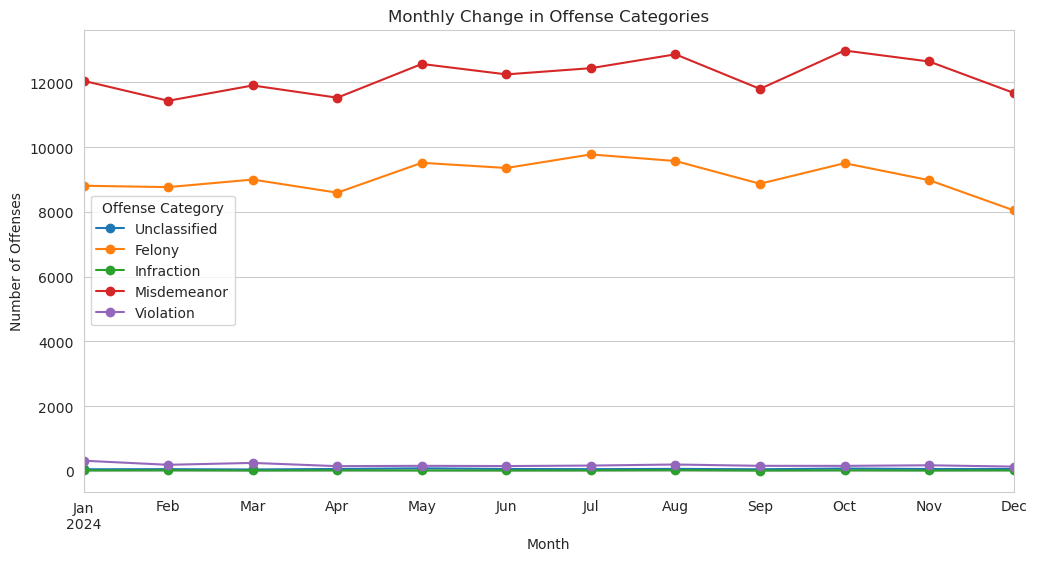

In [107]:
# Category mapping
category_map = {
    'F': 'Felony',
    'M': 'Misdemeanor',
    '9': 'Unclassified',
    'V': 'Violation',
    'I': 'Infraction'
}

# Convert Arrest_Date to datetime if not already
df['Arrest_Date'] = pd.to_datetime(df['Arrest_Date'])

# Group by year-month and offense category, then count occurrences
monthly_counts = df.groupby([df['Arrest_Date'].dt.to_period('M'), 'Offense_Category_Code']).size().unstack()

# Rename columns using category_map
monthly_counts = monthly_counts.rename(columns=category_map)

# Plot
plt.figure(figsize=(12, 6))
monthly_counts.plot(kind='line', marker='o', figsize=(12, 6))

plt.title('Monthly Change in Offense Categories')
plt.xlabel('Month')
plt.ylabel('Number of Offenses')
plt.legend(title='Offense Category')
plt.grid(True)
plt.show()

In [108]:
df.columns

Index(['Unnamed: 0', 'Arrest_Date', 'Police_Department_Code',
       'Offense_Description', 'Offense_Key_Code',
       'Offense_Detailed_Description', 'Law_Code', 'Offense_Category_Code',
       'Arrest_Borough', 'Arrest_Precinct', 'Jurisdiction_Code',
       'Perpetrator_Age_Group', 'Perpetrator_Sex', 'Perpetrator_Race',
       'Latitude', 'Longitude', 'Location', 'Arrest_Day_of_Week'],
      dtype='object')

<Figure size 1200x600 with 0 Axes>

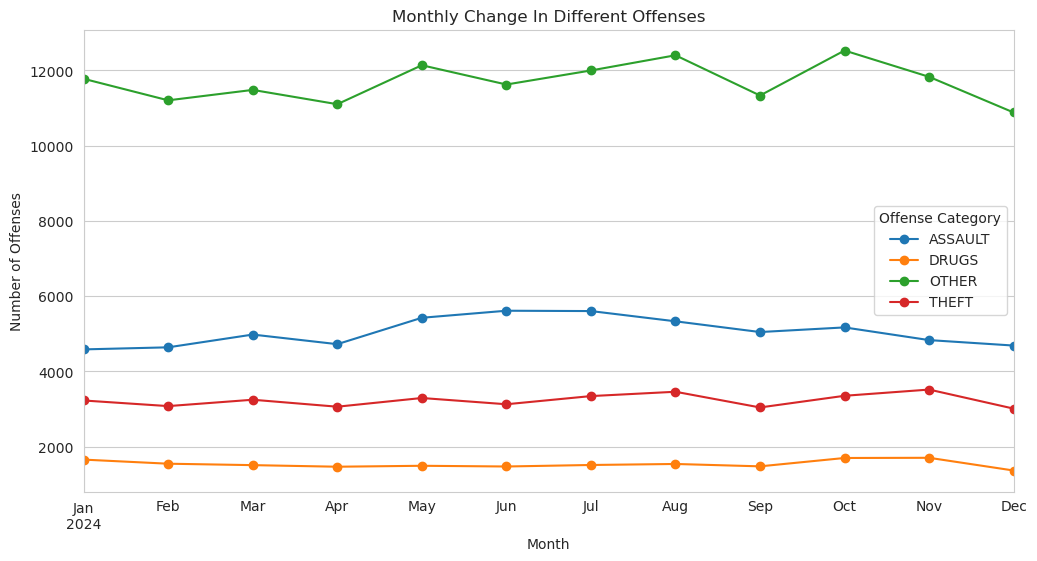

In [109]:
# Convert Arrest_Date to datetime if not already
df['Arrest_Date'] = pd.to_datetime(df['Arrest_Date'])

# Group by year-month and offense category, then count occurrences
monthly_counts = df.groupby([df['Arrest_Date'].dt.to_period('M'), 'Offense_Detailed_Description']).size().unstack()

# Rename columns using category_map
monthly_counts = monthly_counts.rename(columns=category_map)

# Plot
plt.figure(figsize=(12, 6))
monthly_counts.plot(kind='line', marker='o', figsize=(12, 6))

plt.title('Monthly Change In Different Offenses')
plt.xlabel('Month')
plt.ylabel('Number of Offenses')
plt.legend(title='Offense Category')
plt.grid(True)

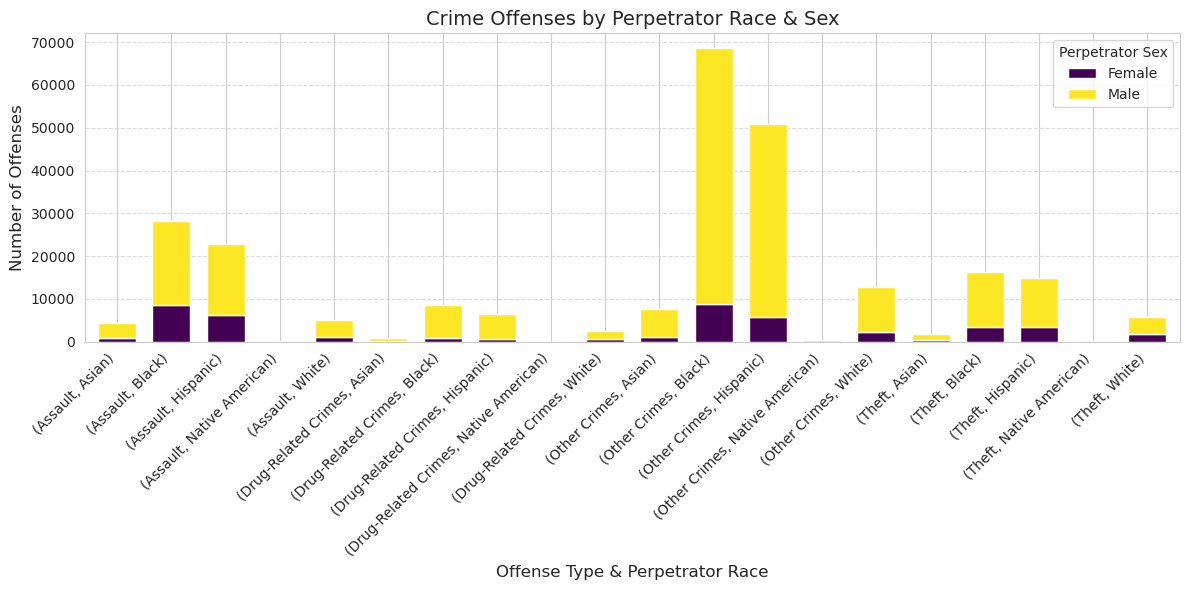

In [110]:

# Mapping labels for better readability
offense_labels = {
    'OTHER': 'Other Crimes',
    'ASSAULT': 'Assault',
    'DRUGS': 'Drug-Related Crimes',
    'THEFT': 'Theft'
}

race_labels = {
    'BLACK': 'Black',
    'WHITE': 'White',
    'HISPANIC': 'Hispanic',
    'UNKNOWN': 'Unknown',
    'ASIAN': 'Asian',
    'NATIVE AMERICAN': 'Native American'
}

gender_labels = {
    'M': 'Male',
    'F': 'Female'
}

# Apply the label mappings
df['Offense_Detailed_Description'] = df['Offense_Detailed_Description'].map(offense_labels)
df['Perpetrator_Race'] = df['Perpetrator_Race'].map(race_labels)
df['Perpetrator_Sex'] = df['Perpetrator_Sex'].map(gender_labels)

# Count occurrences
grouped_df = df.groupby(['Offense_Detailed_Description', 'Perpetrator_Race', 'Perpetrator_Sex']).size().reset_index(name='Count')

# Pivot the DataFrame to reshape it for stacked bars
pivot_df = grouped_df.pivot_table(index=['Offense_Detailed_Description', 'Perpetrator_Race'], columns='Perpetrator_Sex', values='Count', fill_value=0)

# Plot stacked bar chart
pivot_df.plot(kind='bar', stacked=True, figsize=(12, 6), width=0.7, colormap='viridis')

# Customize plot
plt.title('Crime Offenses by Perpetrator Race & Sex', fontsize=14)
plt.xlabel('Offense Type & Perpetrator Race', fontsize=12)
plt.ylabel('Number of Offenses', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title="Perpetrator Sex", fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()

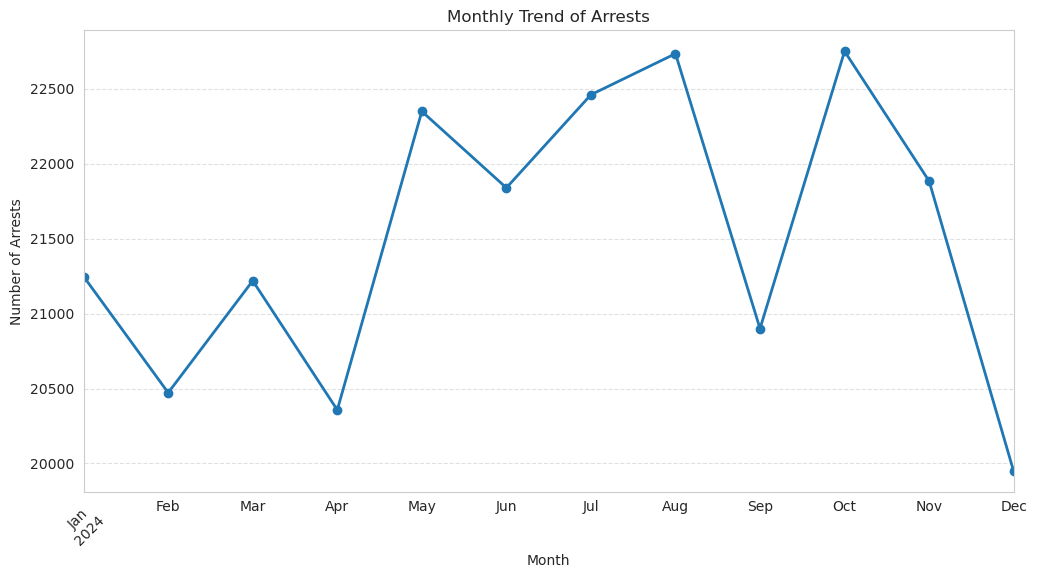

In [111]:
# Count arrests per month
monthly_arrests = df.groupby(df['Arrest_Date'].dt.to_period('M')).size()

# Plot
plt.figure(figsize=(12, 6))
monthly_arrests.plot(kind='line', marker='o', linewidth=2)

plt.title('Monthly Trend of Arrests')
plt.xlabel('Month')
plt.ylabel('Number of Arrests')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)

plt.show()

In [115]:
df.columns

Index(['Unnamed: 0', 'Arrest_Date', 'Police_Department_Code',
       'Offense_Description', 'Offense_Key_Code',
       'Offense_Detailed_Description', 'Law_Code', 'Offense_Category_Code',
       'Arrest_Borough', 'Arrest_Precinct', 'Jurisdiction_Code',
       'Perpetrator_Age_Group', 'Perpetrator_Sex', 'Perpetrator_Race',
       'Latitude', 'Longitude', 'Location', 'Arrest_Day_of_Week'],
      dtype='object')

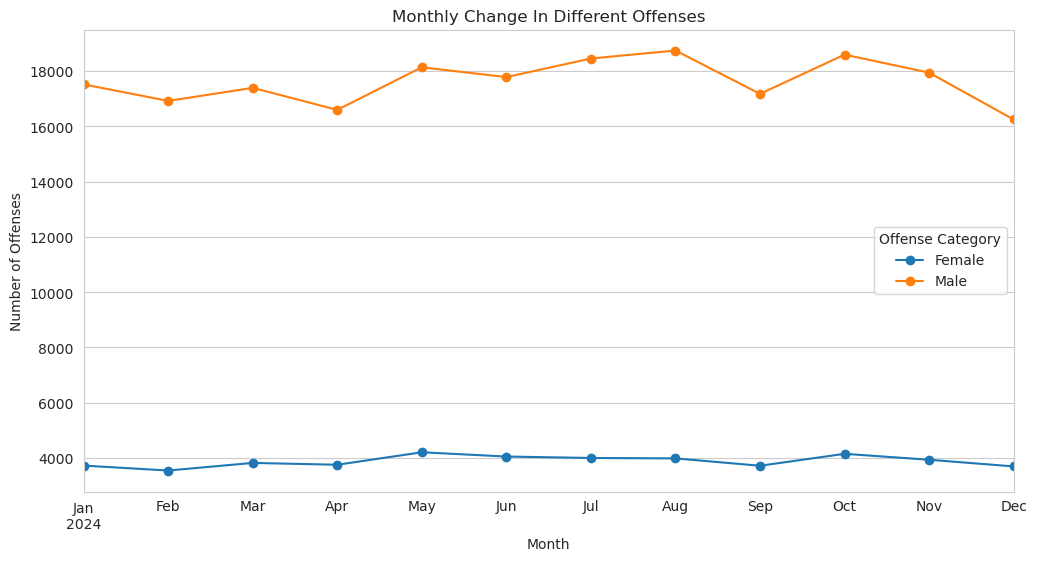

In [141]:
# Convert Arrest_Date to datetime if not already

"""
There is a significant gap between the number of males and females arrested throughout the year.
"""

df['Arrest_Date'] = pd.to_datetime(df['Arrest_Date'])

# Group by year-month and offense category, then count occurrences
monthly_counts = df.groupby([df['Arrest_Date'].dt.to_period('M'), 'Perpetrator_Sex']).size().unstack()

# Rename columns using category_map
monthly_counts = monthly_counts.rename(columns=category_map)

# Plot
# plt.figure(figsize=(12, 6))
monthly_counts.plot(kind='line', marker='o', figsize=(12, 6))

plt.title('Montly arrested count by gender')
plt.xlabel('Month')
plt.ylabel('Number of Offenses')
plt.legend(title='Offense Category')
plt.grid(True)



In [183]:
df[(df["Perpetrator_Sex"] == "Male") & (df["Arrest_Date"].dt.month == 1)].count()

Unnamed: 0                      17521
Arrest_Date                     17521
Police_Department_Code          17521
Offense_Description             17519
Offense_Key_Code                17519
Offense_Detailed_Description    17521
Law_Code                        17521
Offense_Category_Code           17521
Arrest_Borough                  17521
Arrest_Precinct                 17521
Jurisdiction_Code               17521
Perpetrator_Age_Group           17521
Perpetrator_Sex                 17521
Perpetrator_Race                17521
Latitude                        17521
Longitude                       17521
Location                        17521
Arrest_Day_of_Week              17521
dtype: int64

In [184]:
df[(df["Perpetrator_Sex"] == "Female") & (df["Arrest_Date"].dt.month == 1)].count()

Unnamed: 0                      3726
Arrest_Date                     3726
Police_Department_Code          3726
Offense_Description             3724
Offense_Key_Code                3724
Offense_Detailed_Description    3726
Law_Code                        3726
Offense_Category_Code           3726
Arrest_Borough                  3726
Arrest_Precinct                 3726
Jurisdiction_Code               3726
Perpetrator_Age_Group           3726
Perpetrator_Sex                 3726
Perpetrator_Race                3726
Latitude                        3726
Longitude                       3726
Location                        3726
Arrest_Day_of_Week              3726
dtype: int64